# **Exploration  of Montgomory county crash data**

**By**

*   **Gaurav Singh**
*   **Wayne Hayden**





# **Introduction**

In this dataset we will examine the collisions that have occured in Montogomory county. The data is collected by police and is filled with information regarding the location, involved vehicles, weather, road, speed limit, date and time and other crash related information. We will be using this data to determine which hour, day of the week, roads,etc can be considered as collision hotspots and much more. 

From the website "The dataset reports details of all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police." We can see this data is gathered through the various police departments of the county. The data we are working on is from the website https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632 . The data was accessed and downloaded on 20th October 2020

import the libraries for the project and the files


In [136]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [137]:
#Read the data in from the google drive into a dataframe

data_dir = "/content/drive/My Drive/Project 01/Crash_Reporting_-_Drivers_Data.csv"
df = pd.read_csv(data_dir)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [138]:
#Set seaborn figure size
sns.set(rc={'figure.figsize':(12,9)})

# **Initial** **Exploration**

In [139]:
#First we will convert the dates to pandas datetime so we can later use the dates and time for further analysis. Then we sort the date in ascending order

df.index = pd.to_datetime(df['Crash Date/Time'])
df = df.sort_index()
df['Crash Date/Time']

Crash Date/Time
2015-01-01 00:30:00    01/01/2015 12:30:00 AM
2015-01-01 00:30:00    01/01/2015 12:30:00 AM
2015-01-01 01:10:00    01/01/2015 01:10:00 AM
2015-01-01 01:10:00    01/01/2015 01:10:00 AM
2015-01-01 01:14:00    01/01/2015 01:14:00 AM
                                ...          
2020-10-14 17:50:00    10/14/2020 05:50:00 PM
2020-10-15 09:28:00    10/15/2020 09:28:00 AM
2020-10-15 09:28:00    10/15/2020 09:28:00 AM
2020-10-15 10:47:00    10/15/2020 10:47:00 AM
2020-10-15 10:47:00    10/15/2020 10:47:00 AM
Name: Crash Date/Time, Length: 116116, dtype: object

The data set has 116116 rows and 43 columns. Out of all the columns 39 of them are of type object with two int64 type and two float64 type columns in there as well. So we don't really have many numeric columns to work with

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116116 entries, 2015-01-01 00:30:00 to 2020-10-15 10:47:00
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   116116 non-null  object 
 1   Local Case Number               116116 non-null  object 
 2   Agency Name                     116116 non-null  object 
 3   ACRS Report Type                116116 non-null  object 
 4   Crash Date/Time                 116116 non-null  object 
 5   Route Type                      104861 non-null  object 
 6   Road Name                       105425 non-null  object 
 7   Cross-Street Type               104847 non-null  object 
 8   Cross-Street Name               105421 non-null  object 
 9   Off-Road Description            10690 non-null   object 
 10  Municipality                    12647 non-null   object 
 11  Related Non-Motorist            3625 non-nul

Many of the columns have null values. We will next look at the fraction of NA values in the columns in descending order.

In [141]:
df.isna().sum().sort_values(ascending=False)/len(df)

Non-Motorist Substance Abuse      0.975283
Related Non-Motorist              0.968781
Off-Road Description              0.907937
Municipality                      0.891083
Circumstance                      0.806461
Equipment Problems                0.221236
Driver Substance Abuse            0.183032
Traffic Control                   0.158678
Surface Condition                 0.118459
Cross-Street Type                 0.097050
Route Type                        0.096929
Cross-Street Name                 0.092106
Road Name                         0.092072
Weather                           0.079076
Drivers License State             0.047926
Vehicle Continuing Dir            0.014813
Vehicle Going Dir                 0.014813
Vehicle Body Type                 0.014399
Light                             0.008250
Collision Type                    0.003350
Vehicle Second Impact Location    0.002205
Vehicle Movement                  0.002041
Vehicle Damage Extent             0.001774
Vehicle Fir

We will check for empty strings in the data which may imply NA values

In [142]:
df.select_dtypes(include='object').apply(lambda x: x.eq('')).sum()

Report Number                     0
Local Case Number                 0
Agency Name                       0
ACRS Report Type                  0
Crash Date/Time                   0
Route Type                        0
Road Name                         0
Cross-Street Type                 0
Cross-Street Name                 0
Off-Road Description              0
Municipality                      0
Related Non-Motorist              0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Non-Motorist Substance Abuse      0
Person ID                         0
Driver At Fault                   0
Injury Severity                   0
Circumstance                      0
Driver Distracted By              0
Drivers License State             0
Vehicle ID                        0
Vehicle Damage Extent             0
Vehicle First Impact Locatio

No empty strings found in the data

We can see below that the Speed Limit column has values like 0 . It might indicate bad data or that 0 means there was no speed limit. 5 might be possible if we are talking about collisions that might have happened in a place like parking lot.

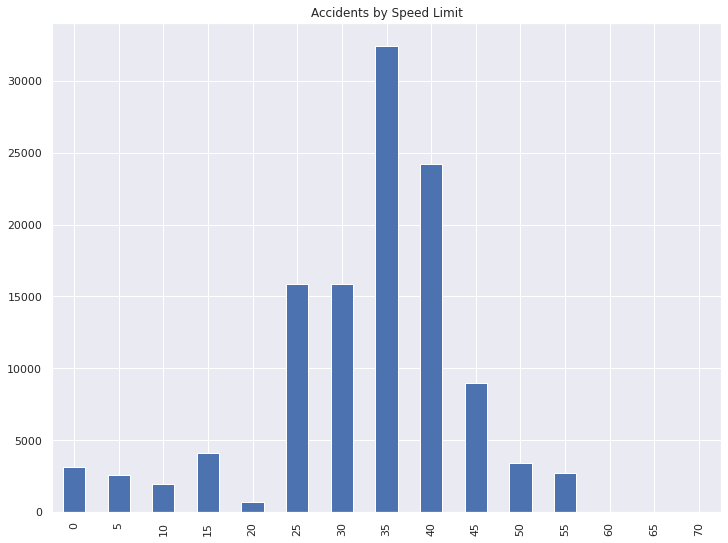

In [143]:
df['Speed Limit'].value_counts().sort_index().plot.bar().set(title='Accidents by Speed Limit');

# **Data cleaning and preprocessing**

We are going to drop the columns which have more than 80% NA values in them


In [144]:
df.drop(['Non-Motorist Substance Abuse','Related Non-Motorist','Off-Road Description','Municipality','Circumstance'],axis=1,inplace=True)

After the inplace drop we can see the columns have been removed and now we are left with 38 columns

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116116 entries, 2015-01-01 00:30:00 to 2020-10-15 10:47:00
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   116116 non-null  object 
 1   Local Case Number               116116 non-null  object 
 2   Agency Name                     116116 non-null  object 
 3   ACRS Report Type                116116 non-null  object 
 4   Crash Date/Time                 116116 non-null  object 
 5   Route Type                      104861 non-null  object 
 6   Road Name                       105425 non-null  object 
 7   Cross-Street Type               104847 non-null  object 
 8   Cross-Street Name               105421 non-null  object 
 9   Collision Type                  115727 non-null  object 
 10  Weather                         106934 non-null  object 
 11  Surface Condition               102361 non-n

Next we will replace some values with nan values which are common throughout the dataset and may indicate missing data. 

In [146]:
df.replace(['UNKNOWN','Unknown','OTHER'],np.nan,inplace=True)

We can see that 'Driver at fault',  'Injury Severity', 'Driver Distracted By' and 'Driverless vehicle' now contain nan values and percentage of nan values has increased in some columns

In [147]:
df.isna().sum().sort_values(ascending=False)/len(df)

Equipment Problems                0.297048
Driver Substance Abuse            0.246882
Driver Distracted By              0.179364
Cross-Street Type                 0.172956
Traffic Control                   0.171880
Surface Condition                 0.122447
Collision Type                    0.116814
Route Type                        0.097058
Cross-Street Name                 0.092106
Road Name                         0.092072
Weather                           0.084950
Drivers License State             0.047926
Vehicle Continuing Dir            0.046669
Vehicle Going Dir                 0.043749
Vehicle Damage Extent             0.036980
Vehicle Body Type                 0.030401
Driver At Fault                   0.024045
Vehicle Movement                  0.021754
Vehicle Model                     0.020350
Vehicle Make                      0.019420
Vehicle Second Impact Location    0.017965
Vehicle First Impact Location     0.017172
Light                             0.014020
Driverless 

Now let's drop all the columns which we are not going to use.

In [148]:
df.drop(['Report Number','Local Case Number','Agency Name','ACRS Report Type','Route Type','Cross-Street Type','Cross-Street Name','Surface Condition','Light','Person ID','Driver At Fault','Drivers License State',
         'Vehicle ID','Vehicle First Impact Location','Vehicle Second Impact Location','Vehicle Body Type','Vehicle Continuing Dir','Vehicle Going Dir','Driverless Vehicle','Parked Vehicle','Vehicle Year',
         'Equipment Problems','Latitude','Longitude','Location','Vehicle Model','Vehicle Movement'],axis=1,inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116116 entries, 2015-01-01 00:30:00 to 2020-10-15 10:47:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Crash Date/Time         116116 non-null  object
 1   Road Name               105425 non-null  object
 2   Collision Type          102552 non-null  object
 3   Weather                 106252 non-null  object
 4   Traffic Control         96158 non-null   object
 5   Driver Substance Abuse  87449 non-null   object
 6   Injury Severity         116116 non-null  object
 7   Driver Distracted By    95289 non-null   object
 8   Vehicle Damage Extent   111822 non-null  object
 9   Speed Limit             116116 non-null  int64 
 10  Vehicle Make            113861 non-null  object
dtypes: int64(1), object(10)
memory usage: 10.6+ MB


Now we are left with only 10 columns to work with.

The data set has 1451 Vehicle makes and we can see that many of the values are the same such as Chev and Chevrolet. We should eliminate duplicate values for the top entries. As we can see there are many values which are duplicates but after a lot of replacing most are less than 250 and should not have a large impact. This duplication seems to a be a problem with this data set.

In [150]:
df['Vehicle Make'].replace(['TOYT','HOND','CHEV','CHEVY','NISS','HYUN','MERZ','VOLK','ACUR','DODG','SUBA','MAZD','CHRY','THOM','LEXS','MITS','LEXU','FRHT','CADI','VW','VOLKSWAGON','VOLK','VOLV','CADILAC'],
['TOYOTA','HONDA','CHEVROLET','CHEVROLET','NISSAN','HYUNDAI','MERCEDES','VOlKSWAGEN','ACURA','DODGE','SUBARU','MAZDA','CHRYSLER','THOMAS','LEXUS','MITSUBISHI','LEXUS','FREIGHTLINER','CADILLAC','VOLKSWAGEN','VOLKSWAGEN','VOLKSWAGEN','VOLVO','CADILLAC'],inplace=True)

Make a new column 'new_Driver Substance Abuse' which contains values from 'Driver Substance Abuse' column where the values which are not 'NONE DETECTED' are replaced with 'DETECTED'

In [151]:
substanceAbuse = df['Driver Substance Abuse'].values
substanceAbuse2 = np.where((substanceAbuse!='NONE DETECTED') & (substanceAbuse=='ALCOHOL PRESENT') |  (substanceAbuse=='ALCOHOL CONTRIBUTED')|  (substanceAbuse=='ILLEGAL DRUG PRESENT')|(substanceAbuse=='ILLEGAL DRUG CONTRIBUTED')|(substanceAbuse=='COMBINED SUBSTANCE PRESENT')
|(substanceAbuse=='MEDICATION CONTRIBUTED')|(substanceAbuse=='COMBINATION CONTRIBUTED')|(substanceAbuse=='MEDICATION PRESENT'),'DETECTED',substanceAbuse)
df['new_Driver Substance Abuse']=substanceAbuse2

Creating a new column that contains hour from the datetime index.

In [152]:
df['hour'] = df.index.hour

With the data cleaning done we can now proceed to Data Exploration

# **Data exploration and visualization**

We will plot the number of accidents in every hour of the day using seaborn's countplot() function

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


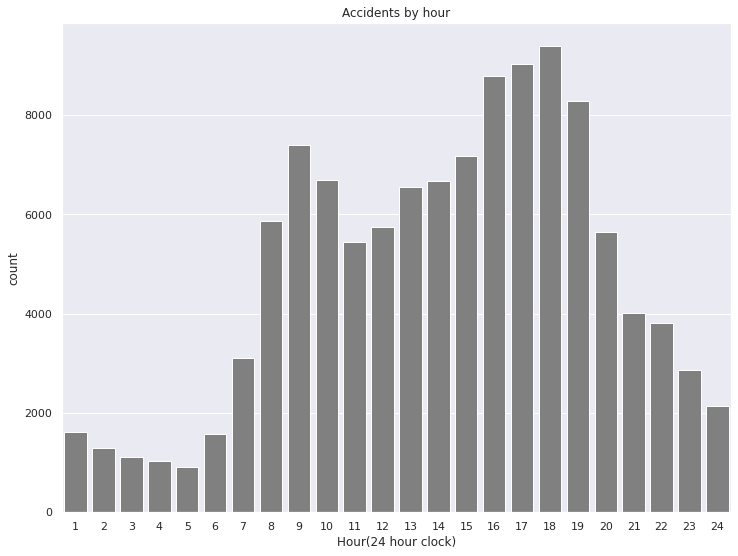

In [153]:
hour = df.index.hour
ax = sns.countplot(hour,palette=['grey'],saturation=0)
ax.set_title('Accidents by hour')
ax.set_xticklabels(np.arange(1,25,1))
ax.set_xlabel('Hour(24 hour clock)');

The graph shows an interesting shape with two peaks. This shape is expected since the peaks are around 9:00 am and 6:00 pm which are common commuting times when many people will be driving. We also see that day time hours have more accidents then night time driving. This can be attributed to the increased number of drivers during the day. While we dont have data for total number of drivers at any given hour we suspect that it would look close to this bar graph

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


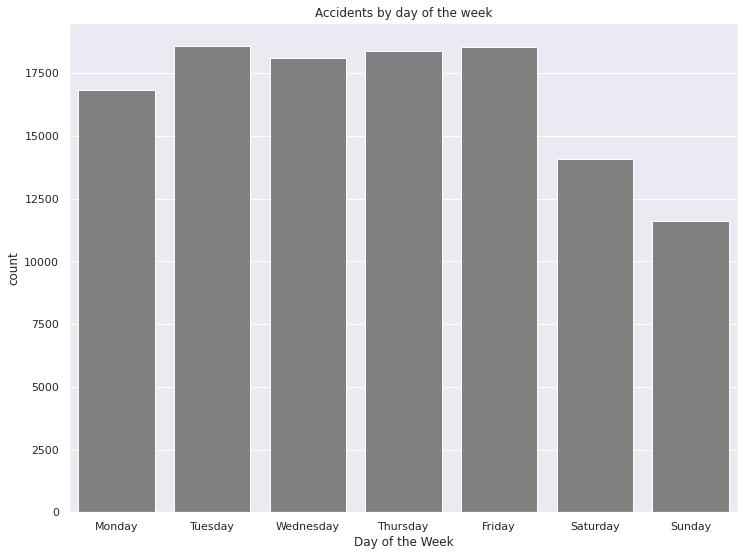

In [154]:
day = df.index.dayofweek
ax = sns.countplot(day,palette=['grey'],saturation=0).set(xlabel='Day of the Week',xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],title='Accidents by day of the week');

Continuing with the time theme we graphed the crashes by day of the week. The graph shows higher rates of crashed during the weekdays than on weekends. This is probably due to a higher number of drivers on weekdays than weekends.

From the last two graphs we can probaly conclude that accidents are highly correlated with the number of drivers but we have insufficient data to prove this conclusion.

Now we are going to take a look at Driver Substance Abuse by hour. Let's see if there are any particular hours where drivers under influence are at peak.

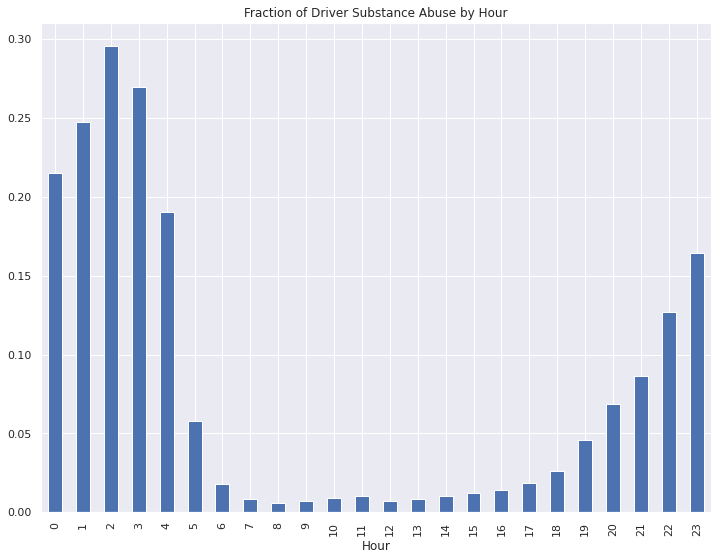

In [155]:
df7=df

clear_by_coll_type = df7.groupby('hour')['new_Driver Substance Abuse'].apply(lambda x: (x == 'DETECTED').mean())
clear_by_coll_type.plot.bar().set(xlabel='Hour', title='Fraction of Driver Substance Abuse by Hour');


Substance Abuse like drugs or alcohol were mostly detected in drivers in early morning times like midnight to 4:00 AM and late night hours after around 9:00 PM. This indicates driving around these hours can be dangerous as this is the peak time when drivers drive under the influence.

We will now look at the make of the vehicles. Let's see whether there are any particular vehicle makes which are more fragile than the others during collisions

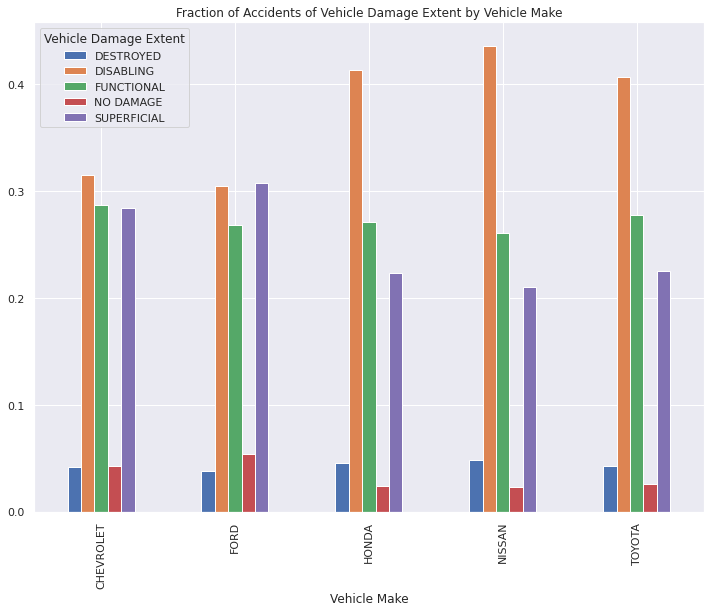

In [156]:
df3=df
top_var1 = df3['Vehicle Make'].value_counts()[0:5].index
df3 = df3[df3['Vehicle Make'].isin(top_var1)]
tb1 = pd.crosstab(df3['Vehicle Make'],df3['Vehicle Damage Extent'])
tb1 = tb1.div(df3['Vehicle Make'].value_counts(), axis=0)
tb1.plot.bar().set(xlabel='Vehicle Make',title='Fraction of Accidents of Vehicle Damage Extent by Vehicle Make');

Here we can see the rate of disabling damage is higher in Honda, Nissan, and Toyota than in Chevrolet and Ford while the opposite can be said about superficial damage. It seems the in Honda, Nissan and Toyota damage is more likely to disable the car than to be superficial meaning they are more fragile

Now let us look at the top 5 road names for collision with respect to Traffic Control. Generally there should be more accidents in areas where there are no traffic controls but let's see what the plot tells us.

To support the plot of Collisions by Traffic Control we are going to take a look at two other plots.

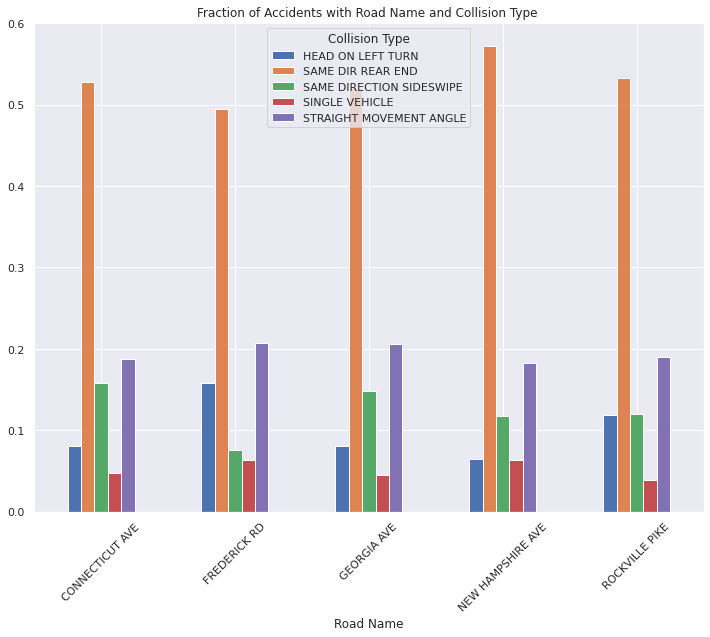

In [157]:
df12=df
top_var1 = df12['Road Name'].value_counts()[0:5].index
df12 = df12[df12['Road Name'].isin(top_var1)]

top_var2 = df12['Collision Type'].value_counts()[:5].index
df12 = df12[df12['Collision Type'].isin(top_var2)]

tb1 = pd.crosstab(df12['Road Name'],df12['Collision Type'])
tb1 = tb1.div(df12['Road Name'].value_counts(), axis=0)
tb1.plot(kind='bar').set(xlabel='Road Name',title='Fraction of Accidents with Road Name and Collision Type ')
plt.xticks(rotation=45);

The above plot tells us that the most common type of collisions that occured in these top 5 roads were collisions that are common on traffic signals. You can see that there are hardly any single vehicle collision which is not very common on traffic signals as one would expect.

Now let's look at the second plot that supports our main plot.

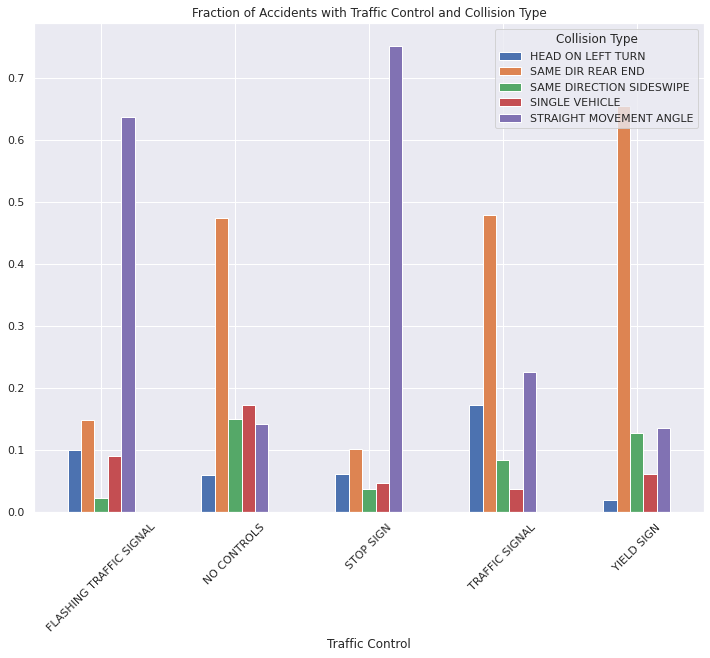

In [158]:
df13=df
top_var1 = df13['Traffic Control'].value_counts()[0:5].index
df13 = df13[df13['Traffic Control'].isin(top_var1)]

top_var2 = df13['Collision Type'].value_counts()[:5].index
df13 = df13[df13['Collision Type'].isin(top_var2)]

tb1 = pd.crosstab(df13['Traffic Control'],df13['Collision Type'])
tb1 = tb1.div(df13['Traffic Control'].value_counts(), axis=0)
tb1.plot(kind='bar').set(xlabel='Traffic Control',title='Fraction of Accidents with Traffic Control and Collision Type')
plt.xticks(rotation=45);

The above plot shows that single vehicle collisions are much more popular in places with no traffic control and types like head on left turn, straight movement angle and same direction rear end is popular in places with traffic signals. We also get some extra information that places with stop sign and flashing traffic signal have unsurprisingly more straight movement angle collisions than other types.

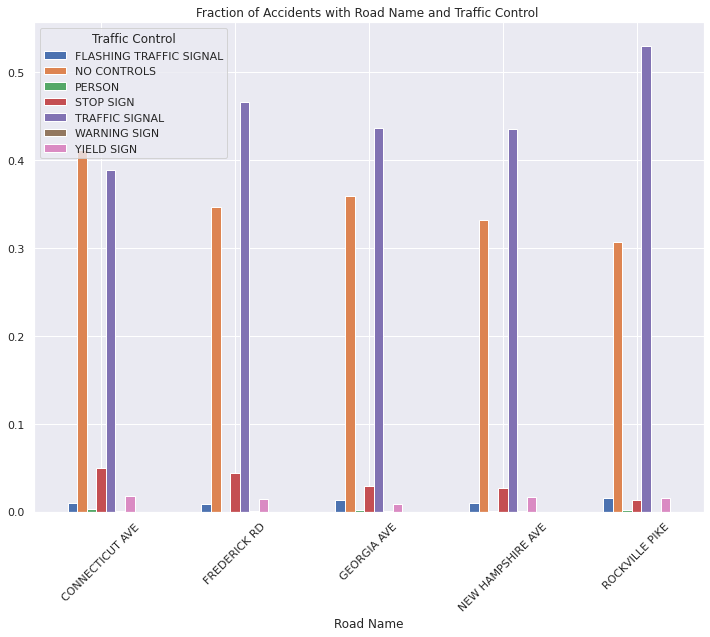

In [159]:
df4=df
top_var1 = df4['Road Name'].value_counts()[0:5].index
df4 = df4[df['Road Name'].isin(top_var1)]
tb1 = pd.crosstab(df4['Road Name'],df4['Traffic Control'])
tb1 = tb1.div(df4['Road Name'].value_counts(), axis=0)
tb1.plot(kind='bar').set(xlabel='Road Name',title='Fraction of Accidents with Road Name and Traffic Control ')
plt.xticks(rotation=45);

We can see that that 4 out of top 5 roads have more collisions when traffic signals were present instead of when there were no traffic controls which is unusual. From the above two plots we can tell that most of the collisions on these particular roads are something which are popular collision types in places with traffic signals. This could indicate that these particular roads might have more places with traffic signals than places with no traffic control.

Does weather affect the type of collisions that occur?Let us have a look.

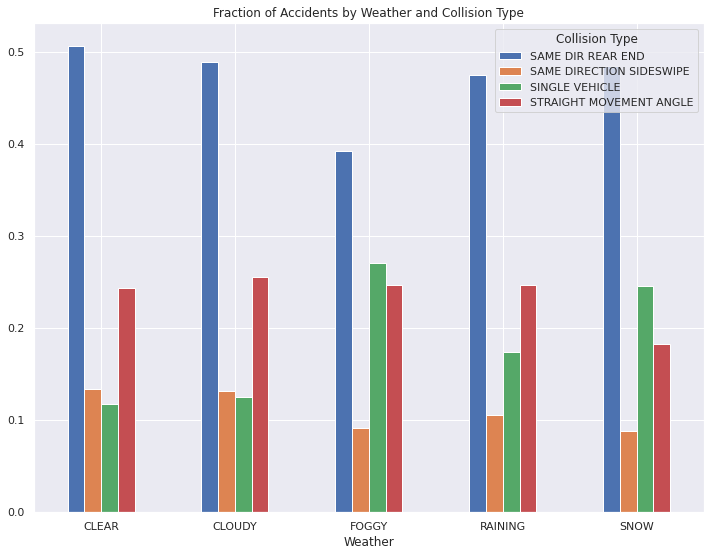

In [160]:
df7=df

top_var1 = df7['Weather'].value_counts()[:5].index
df7 = df7[df7['Weather'].isin(top_var1)]

top_var2 = df7['Collision Type'].value_counts()[:4].index
df7 = df7[df7['Collision Type'].isin(top_var2)]

tb1 = pd.crosstab(df7['Weather'],df7['Collision Type'])
tb1 = tb1.div(df7['Weather'].value_counts(), axis=0)
tb1.plot.bar().set(xlabel='Weather', title='Fraction of Accidents by Weather and Collision Type')
plt.xticks(rotation=360);

We can observe that the fraction of Single Vehicle Collision type is more for weathers which are not clear compared to clear weather. This indicates that there might be visibility issues because of unclear weather which may have led to the collision of the vehicle

Now let's check whether the possibility of a fatal injury is more when the driver is under the influence or not.

In [165]:
df['Injury Severity'].value_counts().sort_index()

FATAL INJURY                   87
NO APPARENT INJURY          94595
POSSIBLE INJURY             11969
SUSPECTED MINOR INJURY       8487
SUSPECTED SERIOUS INJURY      978
Name: Injury Severity, dtype: int64

We need to keep this in mind that there are very few values for serious injury and fatal injury which is not sufficient to accurately predict whether possibility of a fatal injury is more when the driver is under the influence.

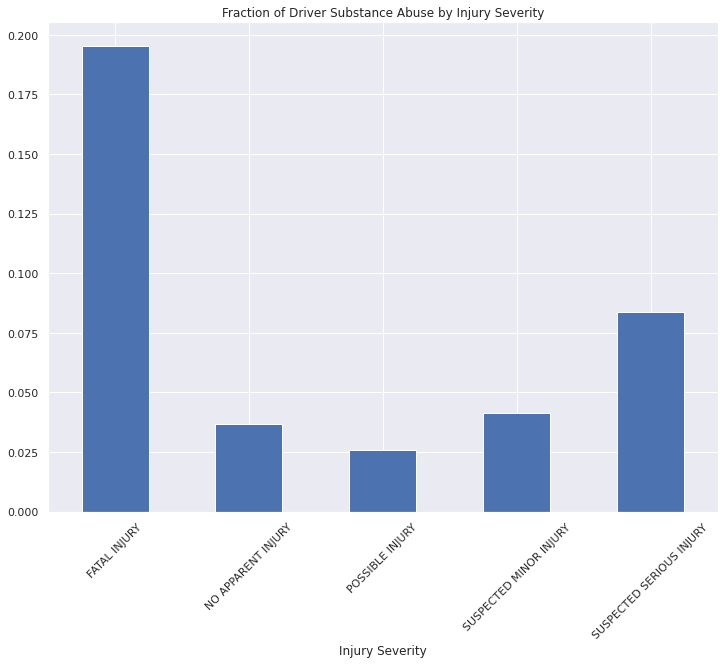

In [161]:
df9=df
clear_by_coll_type = df9.groupby('Injury Severity')['new_Driver Substance Abuse'].apply(lambda x: (x == 'DETECTED').mean())
clear_by_coll_type.plot.bar().set(xlabel='Injury Severity', title='Fraction of Driver Substance Abuse by Injury Severity')
plt.xticks(rotation=45);

From the above plot considering we don't have a lot of data on serious injuries we can say that possibility of a serious or a fatal injury is more when the driver is driving under the influence.

Now let's see whether there is a particular trend in distraction reasons when we plot them by hours and the reason for them. We are going to use a plot of Injury Severity by Driver Distracted By plot to support the Driver Distracted By by hours plot.

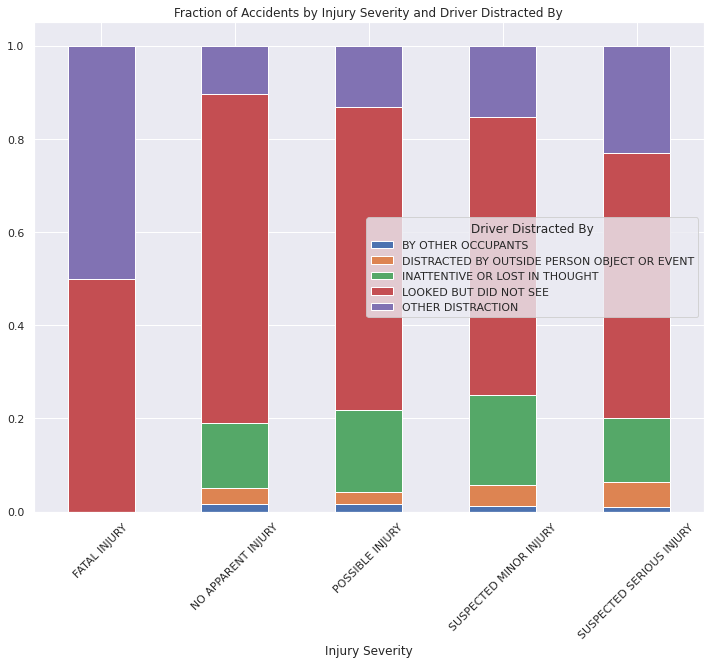

In [162]:
df15=df
top_var1 = df15['Injury Severity'].value_counts().index
df15 = df15[df15['Injury Severity'].isin(top_var1)]

top_var2 = df15['Driver Distracted By'].value_counts()[1:6].index
df15 = df15[df15['Driver Distracted By'].isin(top_var2)]

tb1 = pd.crosstab(df15['Injury Severity'],df15['Driver Distracted By'])
tb1 = tb1.div(df15['Injury Severity'].value_counts(), axis=0)
tb1.plot.bar(stacked=True).set(title='Fraction of Accidents by Injury Severity and Driver Distracted By',xlabel='Injury Severity')
plt.xticks(rotation=45);

From the plot above we see that people report it as Other Distraction as the level of injuries increases. This could be because they can't say they looked but did not see as that might lead to trouble for them so there is a possibility that they report it as Other Distraction

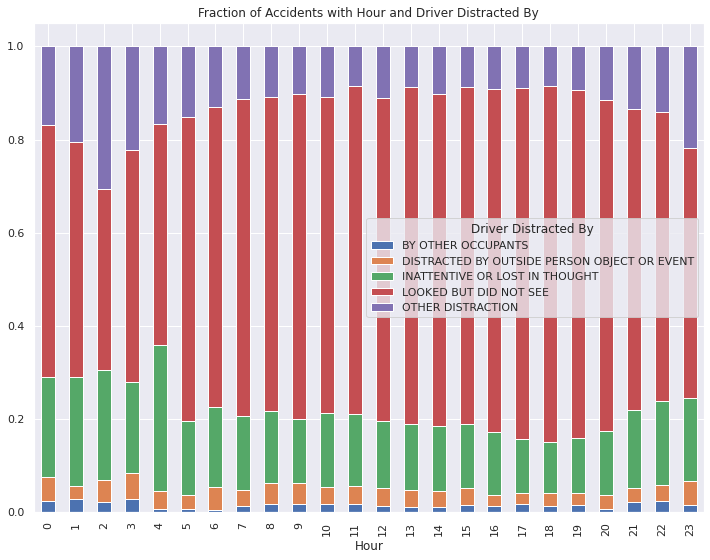

In [163]:
df11=df
top_var1 = df11['hour'].value_counts().index
df11 = df11[df11['hour'].isin(top_var1)]

top_var2 = df11['Driver Distracted By'].value_counts()[1:6].index
df11 = df11[df11['Driver Distracted By'].isin(top_var2)]

tb1 = pd.crosstab(df11['hour'],df11['Driver Distracted By'])
tb1 = tb1.div(df11['hour'].value_counts(), axis=0)
tb1.plot.bar(stacked=True).set(title='Fraction of Accidents with Hour and Driver Distracted By',xlabel='Hour');


From the above plot we see that the reason for collision during early morning hours have more Inattentive or lost in thought values compared to other columns. This could be because of fatigue of the driver driving early in the morning. But we see that the values for looked but did not see is less for early morning hours around 2:00 AM which is unusual as it is night during that time and more chances of not seeing someone even after looking. From the plot above this we can reach to the conclusion that it might just be a false report. 

# **Conclusion**


From the analysis of this dataset we now know the peak hours for collision, peak days for collision, peak hours when drivers drive under the influence, more collisions in places with traffic controls, possibility of a serious injury when driver is under the influence and also what are the different distraction reasons for collisions in different hours. Some issues that came up were presence of lots of NA values, counts for some values were too large and also there was some bad and duplicate data in this dataset.